In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [134]:
df = pd.read_csv(r"Data\cars.csv")
df.head()

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   year        892 non-null    object
 2   Price       892 non-null    object
 3   kms_driven  840 non-null    object
 4   fuel_type   837 non-null    object
dtypes: object(5)
memory usage: 35.0+ KB


In [136]:
df.shape

(892, 5)

In [137]:
df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

### Feature Engineering

### Adding new feature for company names 

In [138]:
df["company"] = df.name.apply(lambda x: x.split(" ")[0])

In [139]:
df.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol,Hyundai
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel,Mahindra
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol,Maruti
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol,Hyundai
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel,Ford


### Data Cleaning

In [140]:
df2 = df.copy()

In [141]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   year        892 non-null    object
 2   Price       892 non-null    object
 3   kms_driven  840 non-null    object
 4   fuel_type   837 non-null    object
 5   company     892 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


### Analyzing year column to start with

In [142]:
df2["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

### So as we can see all the values in year column is not of year type so we need to consider only year type values in the column

In [143]:
df2 = df2[df2["year"].str.isnumeric()]

### Changing the data type of year as it is in object type

In [144]:
df2["year"] = df2["year"].astype(int)

### Price column

In [145]:
df2["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

### as above Price column has "ask for price" in one of the values

In [146]:
df2 = df2[df2["Price"] != "Ask For Price"]

In [147]:
df2.Price

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
886    3,00,000
888    2,60,000
889    3,90,000
890    1,80,000
891    1,60,000
Name: Price, Length: 819, dtype: object

### We need to remove commas from above price column

In [148]:
df2.Price = df2.Price.str.replace(",","").astype(int)

### Handling kms_driven column

In [149]:
df2["kms_driven"]

0        45,000 kms
1            40 kms
3        28,000 kms
4        36,000 kms
6        41,000 kms
           ...     
886    1,32,000 kms
888      27,000 kms
889      40,000 kms
890          Petrol
891          Petrol
Name: kms_driven, Length: 819, dtype: object

### This Column also has comma values which we need to remove 

### Column has additional kms string at the end which is redundant so we need to remove that

In [150]:
df2["kms_driven"] = df2["kms_driven"].str.split(" ").str.get(0).str.replace(",","")

In [151]:
df2["kms_driven"]

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

### As we can see there are two rows with "petrol" in place of some integer value

In [152]:
df2[df2["kms_driven"].isna()]


,name,year,Price,kms_driven,fuel_type,company


### We will consider only the rows for which we get integer values

In [153]:
df2 = df2[df2["kms_driven"].str.isnumeric()]

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   year        817 non-null    int32 
 2   Price       817 non-null    int32 
 3   kms_driven  817 non-null    object
 4   fuel_type   816 non-null    object
 5   company     817 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.3+ KB


In [155]:
df2["kms_driven"] = df2["kms_driven"].astype(int)

### Checking the fuel column

In [156]:
df2[df2["fuel_type"].isna()]


,name,year,Price,kms_driven,fuel_type,company
132,Toyota Corolla,2009,275000,26000,NaN,Toyota


### Changing car names and considering only the first three words for more clarity

In [157]:
df2['name']=df2['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [158]:
df2.head()

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
3,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
4,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
6,Ford Figo,2012,175000,41000,Diesel,Ford


## Resetting the index of final cleaned data

In [159]:
df2 = df2.reset_index(drop=True)


In [160]:
df2.to_csv("Data/preprocessed_car_price_data.csv")


In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   year        817 non-null    int32 
 2   Price       817 non-null    int32 
 3   kms_driven  817 non-null    int32 
 4   fuel_type   816 non-null    object
 5   company     817 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.9+ KB


In [162]:
df2.describe(include = "all")

,name,year,Price,kms_driven,fuel_type,company
count,817,817.000000,8.170000e+02,817.000000,816,817
unique,254,NaN,NaN,NaN,3,25
top,Maruti Suzuki Swift,NaN,NaN,NaN,Petrol,Maruti
freq,51,NaN,NaN,NaN,428,221
mean,NaN,2012.440636,4.115503e+05,46250.714810,NaN,NaN
std,NaN,4.002354,4.749173e+05,34283.745254,NaN,NaN
min,NaN,1995.000000,3.000000e+04,0.000000,NaN,NaN
25%,NaN,2010.000000,1.750000e+05,27000.000000,NaN,NaN
50%,NaN,2013.000000,2.999990e+05,41000.000000,NaN,NaN
75%,NaN,2015.000000,4.900000e+05,56758.000000,NaN,NaN


### Moving on to Outlier removal

In [163]:
df2[df2["Price"]>6e6].value_counts()

name                year  Price    kms_driven  fuel_type  company 
Mahindra XUV500 W6  2014  8500003  45000       Diesel     Mahindra    1
Name: count, dtype: int64

In [164]:
df2 = df2[df2["Price"]<6e6].reset_index(drop=True)

In [165]:
df2

,name,year,Price,kms_driven,fuel_type,company
0,Hyundai Santro Xing,2007,80000,45000,Petrol,Hyundai
1,Mahindra Jeep CL550,2006,425000,40,Diesel,Mahindra
2,Hyundai Grand i10,2014,325000,28000,Petrol,Hyundai
3,Ford EcoSport Titanium,2014,575000,36000,Diesel,Ford
4,Ford Figo,2012,175000,41000,Diesel,Ford
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,2011,270000,50000,Petrol,Maruti
812,Tata Indica V2,2009,110000,30000,Diesel,Tata
813,Toyota Corolla Altis,2009,300000,132000,Petrol,Toyota
814,Tata Zest XM,2018,260000,27000,Diesel,Tata


### Checking the relationships between the variables to understand more about the dataset

In [166]:
df2["company"].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

### Lets see the relation between company and car pricing

In [167]:
import seaborn as sns

In [168]:
# plt.subplots(figsize = (15,7))
# # Custom palette
# palette = sns.color_palette("Set3", len(df.columns))
# ax = sns.boxplot(x="company", y="Price",data=df2, palette=palette)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
# plt.show()

### checking relationship of year the car was bought to the price

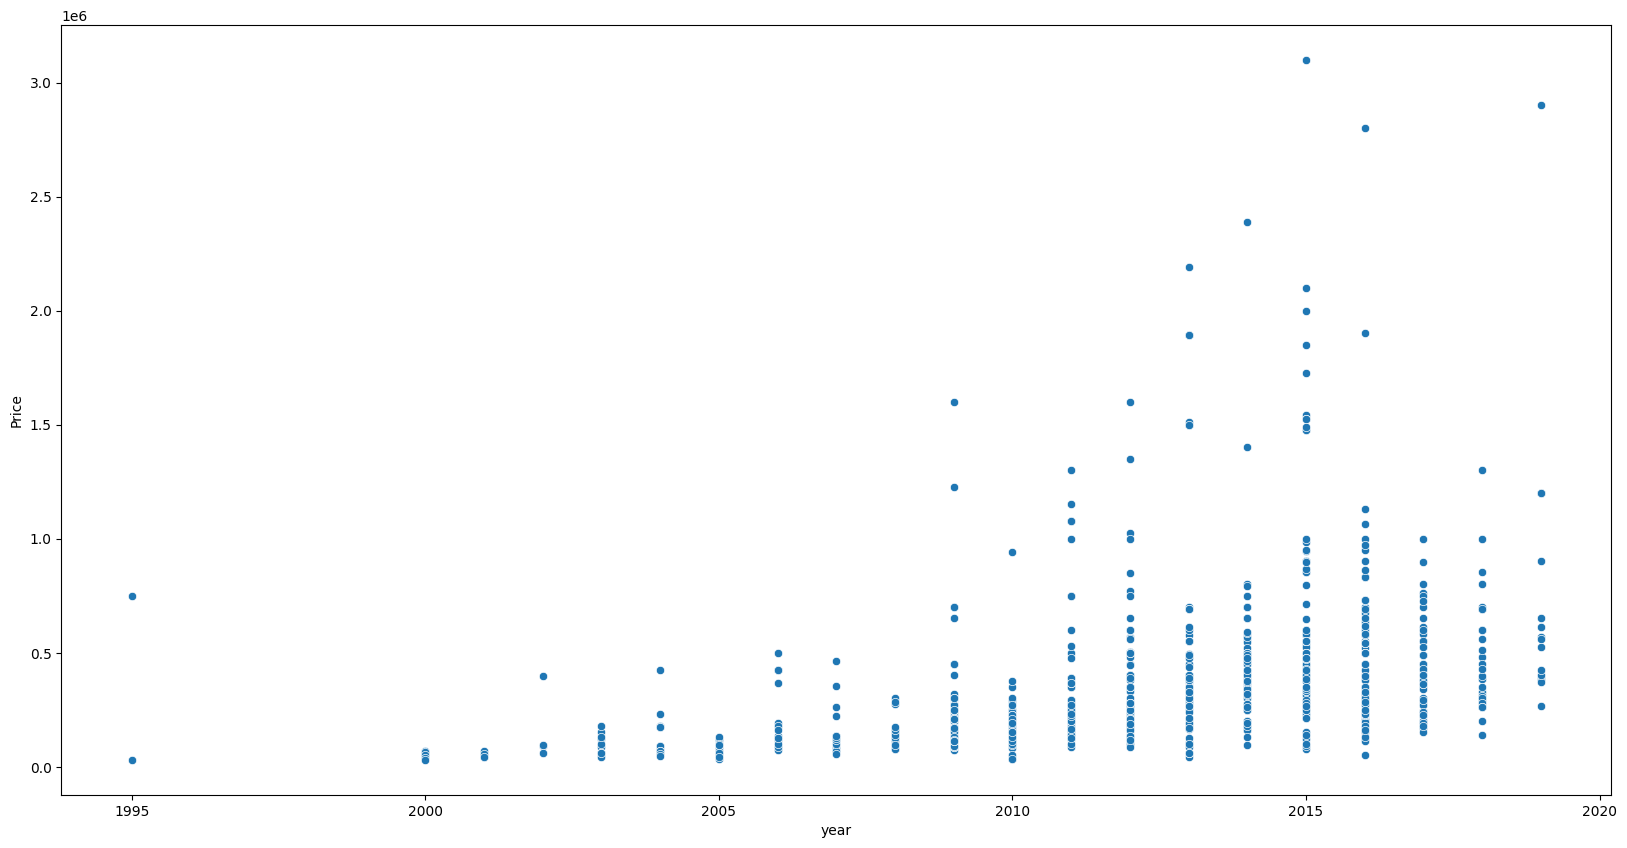

In [169]:
plt.subplots(figsize=(20,10))
sns.scatterplot(x='year', y='Price', data=df2)
plt.show()

### Checking relationship of fuel type with price

C:\Users\NutanTripathy\AppData\Local\Temp\ipykernel_10972\3948784690.py:5: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(x='fuel_type',y='Price',data=df2,hue='fuel_type' ,palette=palette,legend=False)


<Axes: xlabel='fuel_type', ylabel='Price'>

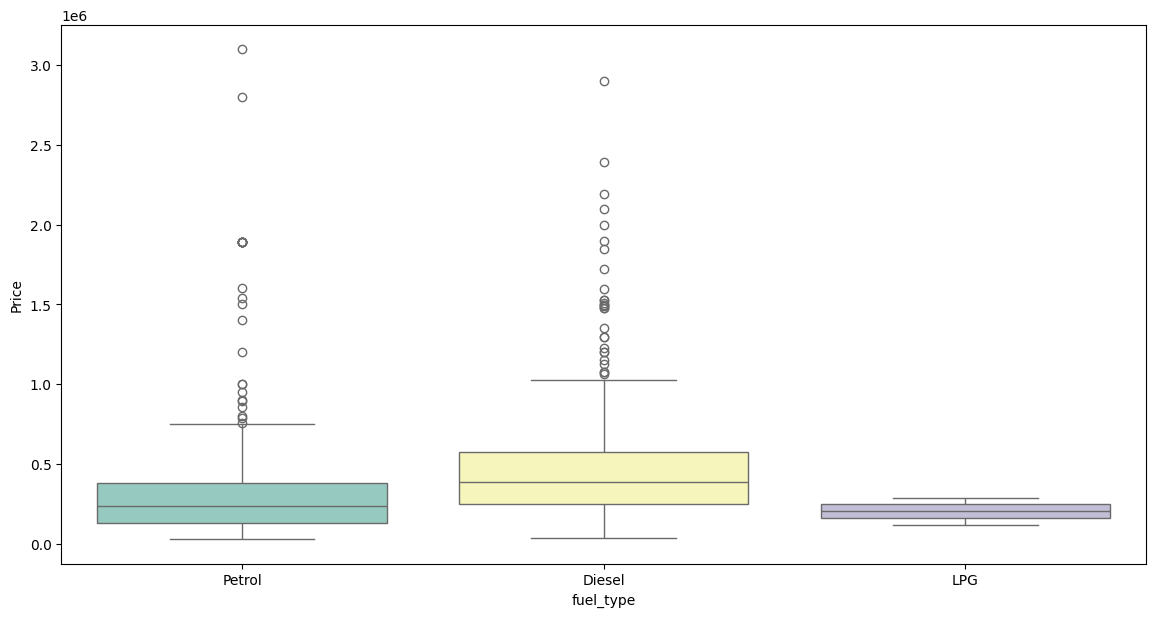

In [170]:
plt.subplots(figsize=(14,7))

# Custom palette
palette = sns.color_palette("Set3")
sns.boxplot(x='fuel_type',y='Price',data=df2,hue='fuel_type' ,palette=palette,legend=False)


### Relationship of Price with FuelType, Year and Company 

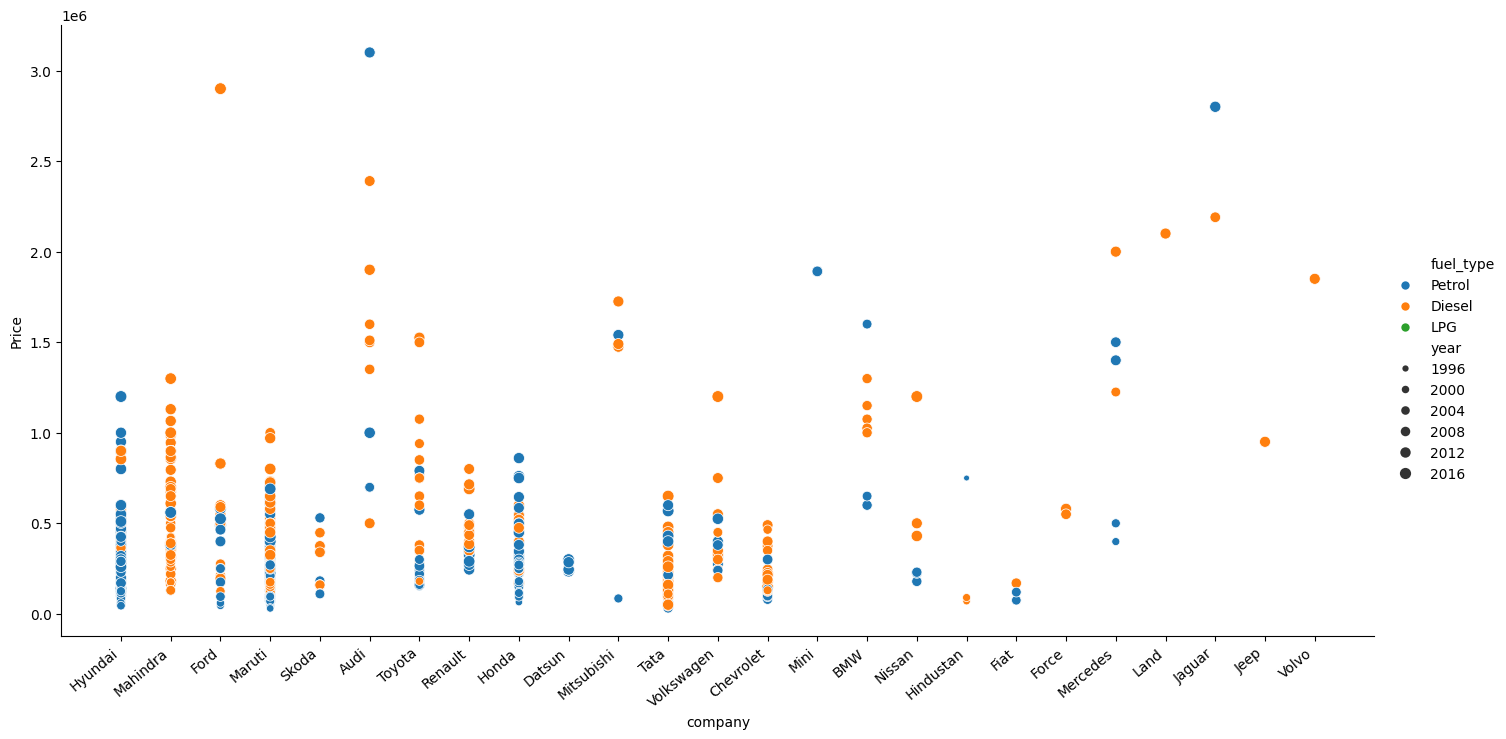

In [171]:
ax=sns.relplot(x='company',y='Price',data=df2,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Treating it as a regression problem we will start the training process

Step 1- Extracting Training Data

In [172]:
X=df2[['name','company','year','kms_driven','fuel_type']]
y=df2['Price']


In [173]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


Step-2 Applying Train Test Split

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating One Hot Encoder object to contain all the possible categories

In [177]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating column transformer to transform categorical columns

In [178]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder="passthrough")

In [179]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

#### We are using linear regression model for the project

In [180]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [181]:
lr_model = LinearRegression()

#### Making a pipeline

In [182]:
pipe = make_pipeline(column_trans,lr_model)

#### Fitting the pipeline

In [183]:
pipe.fit(X_train,y_train)

c:\Users\NutanTripathy\Documents\GitHub\FastApiDockerImplemetation_project\FastAPiDockerImplementation\car_pricing\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol', nan], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

#### Testing the model

In [184]:
y_pred = pipe.predict(X_test)

#### Checking r2 score

In [185]:
r2_score(y_test,y_pred)

0.5556215507241924

In [186]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))



In [187]:
np.argmax(scores)

852

In [188]:
scores[np.argmax(scores)]

0.8939890655889766

In [189]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))



array([435146.28619381])

#### Checking with a random state for choosing the training data

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)


0.8939890655889766

In [191]:
import pickle

In [192]:
pickle.dump(pipe,open(r'model/LinearRegressionModel.pkl','wb'))

In [193]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([451552.72710773])